In [6]:
import krige


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
krige

<module 'krige' from '/wingrdp/homedirs/clm633/independent/image/krige.py'>

In [15]:
from importlib import reload
reload(krige)

<module 'krige' from '/wingrdp/homedirs/clm633/independent/image/krige.py'>

In [16]:
krige.main("2017-10-01")

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 3.189428108537598
Full Sill: 4.421077228009784
Range: 0.07577964695162157
Nugget: 1.2316491194721864 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



array([5.63774692, 5.54223583, 5.51206704, ..., 4.61840587, 4.62328182,
       4.57051392])

In [17]:
z = _

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Kriging will 25nn')

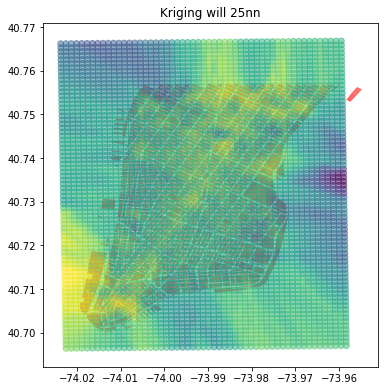

In [33]:
IX = 0

fig, ax = plt.subplots(1, 1, figsize=(6, 11))
krige.in_frame.plot(ax=ax, color='red', alpha=.6)
filt = (krige.out_reset.geometry.centroid.x > -74.03) & (krige.out_reset.geometry.centroid.y > 40.7)
krige.out_reset[filt].plot(ax=ax, color='red', alpha=.6)

ax.scatter(krige.interp_x.ravel(), krige.interp_y.ravel(), c=z.ravel(), alpha=.5)
ax.set_title("Kriging will 25nn")

In [24]:
krige.interp_x.shape

(77, 54)

In [34]:
z

array([5.63774692, 5.54223583, 5.51206704, ..., 4.61840587, 4.62328182,
       4.57051392])

In [ ]:
import geopandas as gpd

In [2]:
import pandas as pd
df = pd.read_csv("../radar/data/2017-10/01/KOKX20171001_000015_V06.ar2v.filtered.csv")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Kriging will 25nn')

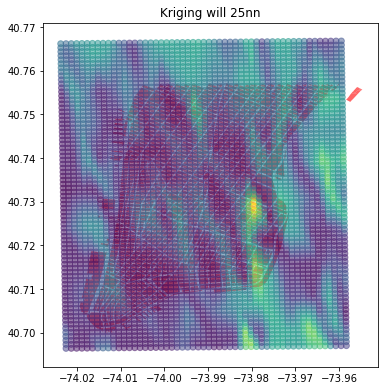

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 11))
krige.in_frame.plot(ax=ax, color='red', alpha=.6)
filt = (krige.out_reset.geometry.centroid.x > -74.03) & (krige.out_reset.geometry.centroid.y > 40.7)
krige.out_reset[filt].plot(ax=ax, color='red', alpha=.6)

ax.scatter(df.lon, df.lat, c=df.dbzh, alpha=.5)
ax.set_title("Kriging will 25nn")

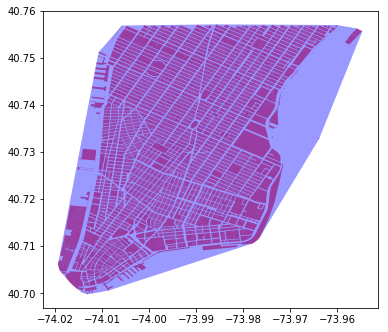

In [19]:
import matplotlib
%matplotlib inline 
fig, ax = plt.subplots(1, 1, figsize=(6, 11))

krige.in_frame.plot(ax=ax, color='red', alpha=.6)
filt = (krige.out_reset.geometry.centroid.x > -74.03) & (krige.out_reset.geometry.centroid.y > 40.7)
krige.out_reset[filt].plot(ax=ax, color='red', alpha=.6)

ch = gpd.GeoSeries(pd.concat([krige.in_frame.geometry, krige.out_reset[filt].geometry])).unary_union.convex_hull
gpd.GeoSeries([ch]).plot(ax=ax, color='blue', alpha=.4)